<a href="https://colab.research.google.com/github/antfolk/BMEN35/blob/main/Session5/BMEN35_Ex14_deep_neural_networks_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Neural Networks part 2
 
In this notebook  we will use the models we generated and saved in the previous part and see how they can be used. Let's start with importing our usual suspects and few new ones.

In [1]:
# The usual imports
from numpy import mean
from numpy import std
from numpy import argmax
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import time
import numpy as np
# from google.colab import files

First we will upload our model files. Choose all the files that you saved and downloaded from the previuos notebook

In [ ]:
# _ = files.upload() # Select all the model files (*.h5)


We will load our dataset again, cast and scale the data.

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# We will use one hot encoding for the target/classes values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Cast to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

We will use our previously trained models now. We will load our models and see how they perform on the test set.

In [3]:
model_a = load_model('model_a.h5')
test_results = model_a.evaluate(X_test, y_test, verbose=0)
print("Test accuracy for Model A is {:.4f} ".format(test_results[1]))
model_b = load_model('model_b.h5')
test_results = model_b.evaluate(X_test, y_test, verbose=0)
print("Test accuracy for Model B is {:.4f} ".format(test_results[1]))
model_c = load_model('model_c.h5')
test_results = model_c.evaluate(X_test, y_test, verbose=0)
print("Test accuracy for Model C is {:.4f} ".format(test_results[1]))
model_d = load_model('model_d.h5')
test_results = model_d.evaluate(X_test, y_test, verbose=0)
print("Test accuracy for Model D is {:.4f} ".format(test_results[1]))

2022-11-18 13:07:32.223179: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Test accuracy for Model A is 0.9633 
Test accuracy for Model B is 0.9713 
Test accuracy for Model C is 0.9797 
Test accuracy for Model D is 0.9603 


Next we will check what can be done using the latter models (model_e and model_f). First we need to reshape the input data 

In [4]:
num_pixels = 784
X_test_r = X_test.reshape((X_test.shape[0], num_pixels))

model_e = load_model('model_e.h5')
test_results = model_e.evaluate(X_test_r, y_test, verbose=0)
print("Test accuracy for Model E is {:.4f} ".format(test_results[1]))
model_f = load_model('model_f.h5')
test_results = model_f.evaluate(X_test_r, y_test, verbose=0)
print("Test accuracy for Model F is {:.4f} ".format(test_results[1]))


Test accuracy for Model E is 0.9055 
Test accuracy for Model F is 0.9357 


Interestingly, the plain vanilla neural network performed quite well.

Next we will see how our trained models perform on a sample image. 

In [ ]:
# img = files.upload() # Select sample_image1.png

(28, 28)


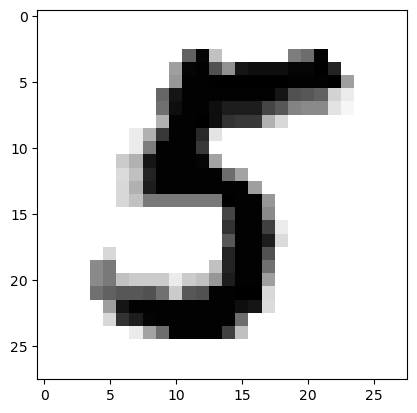

In [5]:
img = load_img('sample_image1.png', color_mode = "grayscale", target_size=(28, 28))
#img = np.asarray(Image.open(filename))
# plot the sample
print(img.size)
fig = plt.figure
plt.imshow(img, cmap='gray')
plt.show()
# convert to array
img = img_to_array(img)
# reshape into a single sample with 1 channel
img = img.reshape(1, 28, 28, 1)
# prepare pixel data
img = img.astype('float32')
img = img / 255.0

Now lets use the uploaded image as input to our models, 

In [6]:
y_hata = model_a.predict(img)
print("Model A predicts {:d} ".format(argmax(y_hata)))
y_hatb = model_b.predict(img)
print("Model B predicts {:d} ".format(argmax(y_hatb)))
y_hatc = model_c.predict(img)
print("Model C predicts {:d} ".format(argmax(y_hatc)))
y_hatd = model_d.predict(img)
print("Model D predicts {:d} ".format(argmax(y_hatd)))
# For the latter models, we will reshape the image
img_r = img.reshape(1,784)
y_hate = model_e.predict(img_r)
print("Model F predicts {:d} ".format(argmax(y_hate)))
y_hatf = model_f.predict(img_r)
print("Model E predicts {:d} ".format(argmax(y_hatf)))


1/1 [==============================] - 0s 70ms/step
Model A predicts 3 
1/1 [==============================] - 0s 61ms/step
Model B predicts 8 
1/1 [==============================] - 0s 58ms/step
Model C predicts 5 
1/1 [==============================] - 0s 76ms/step
Model D predicts 7 
1/1 [==============================] - 0s 42ms/step
Model F predicts 2 
1/1 [==============================] - 0s 36ms/step
Model E predicts 3 


Interestingly, all models are not able to classify this image correctly.
## The End